<a href="https://colab.research.google.com/github/aminzadenoori/Airbnb_Seattle_Data_Analysis/blob/main/Files/Airbnb_Seattle_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part-1**

***Business Understanding:*** 
How the room types, room numbers, and square feet beisedes the neibourhood aeffect the price of a listing?

Intutivley it comes to mind that the price of a listing can highly be corelated to its size and its number of rooms and here we are about to study this assumption by data viusaltion and different methods.

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("Data/listings.csv")


**Columns in data**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

**Visualising missing values proportion** 

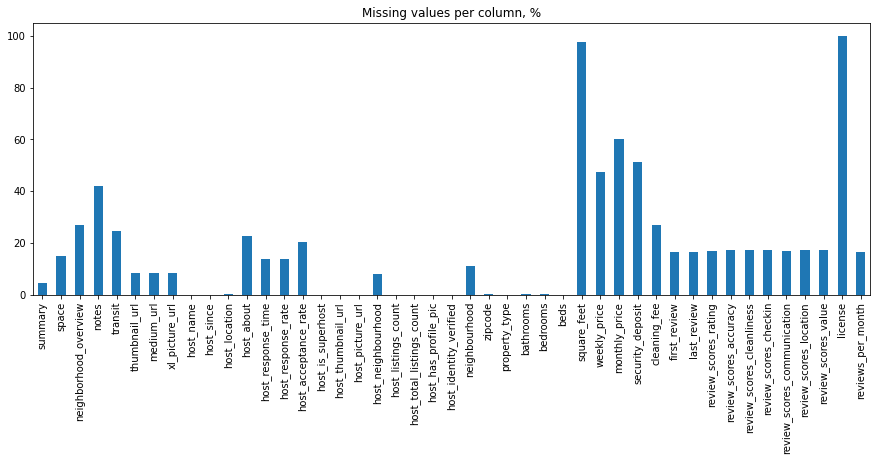

In [ ]:
#find percentage of missing values for each column
listings_missing_df = df.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]

#plot the results
listings_columns_with_nan.plot.bar(title='Missing values per column, %',x='Columns',y='Missing percentage',figsize=(15,5))

**Feature Engineering**



In [ ]:
#Remove non informative coulmn in the data
to_drop=['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_thumbnail_url', 'host_picture_url',
       'first_review', 'last_review']
df.drop(to_drop,axis=1,inplace=True)
#Remove $ sign and spaces in the columns that conatin       
for c in ['cleaning_fee', 'security_deposit', 'price', 'extra_people']:
    df[c] = df[c].replace('[^a-zA-Z0-9]', '', regex=True).apply(lambda x: float(x) / 100)
#dropping constant feats  
constant_feats = []
binary_feats = []
for c in df.columns:
    if df[c].nunique() <= 1:
        constant_feats.append(c)
df.drop(constant_feats, axis=1, inplace=True)
#binary feats
binary_feats = []
for c in df.columns:   
    if df[c].nunique() == 2:
        binary_feats.append(c)
# Encode binary features
for c in ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
          'is_location_exact', 'instant_bookable', 
          'require_guest_profile_picture', 'require_guest_phone_verification']:
    # Fill NA with default
    df[c] = df[c].fillna('f')
    df[c] = df[c].map({'f':0, 't':1})
num_df=df.select_dtypes(exclude='object') 

In [ ]:
#Drop columns with more than 80 percent missing values
df=df.dropna(thresh=0.8,axis=1);
num_df=df.select_dtypes(exclude=['object'])

In [ ]:
#impute the missing values of the numerical columns by mean 
df[num_df.columns]=df[num_df.columns].fillna(df[num_df.columns].mean());

In [ ]:
#categorical columns preperation  by adding dummingvalues
categorical_df=df.select_dtypes(include=['object'])
for col in  categorical_df.columns:
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_',
                            drop_first=True, dummy_na=False)], axis=1)
#drop listing_id and year columns


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


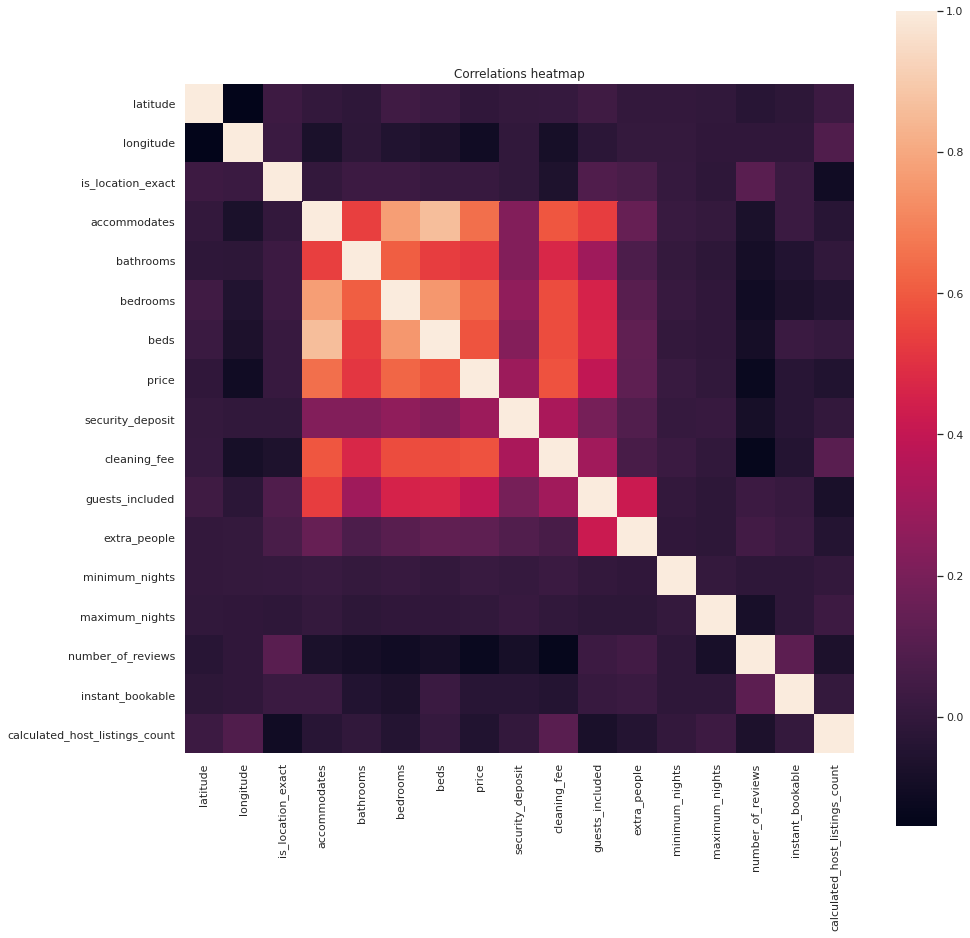

In [ ]:
#Numerical columns to find out correlation
to_drop=['host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified','availability_30', 'availability_60',
       'availability_90', 'availability_365','square_feet','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','require_guest_profile_picture', 'require_guest_phone_verification','reviews_per_month']
num_df=df[num_df.columns]
num_df.drop(to_drop, axis=1,inplace=True)
cols = num_df.columns

#Find out correlation between columns and plot
corrs = np.corrcoef(num_df.values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(15,15)})
hm=sns.heatmap(corrs, cbar = True, annot=False, square = True,
              yticklabels = cols, xticklabels = cols).set_title('Correlations heatmap')

fig = hm.get_figure()
fig.savefig('correlations.png')

**Count the lisitngs in different room types**

In [ ]:
roomType_DF=df.groupby('room_type').price.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'id':'number_Of_Listings'})
roomType_DF

,room_type,price
0,Entire home/apt,2541
1,Private room,1160
2,Shared room,117


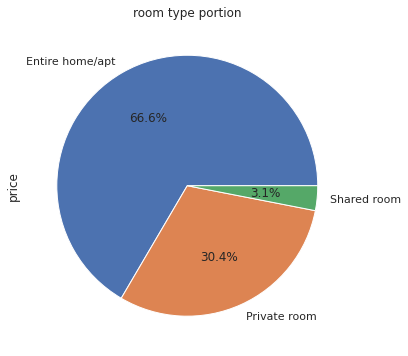

In [ ]:
#type of different rooms in shown in a piechart graph
plt.figure(figsize=(8, 6))
df.groupby('room_type').price.count().plot.pie(autopct="%.1f%%",title="room type portion");


**The average price of listings in different room types**

In [ ]:
roomType_DF=df.groupby('room_type').mean()['price']
roomType_DF=roomType_DF.reset_index()
roomType_DF

,room_type,price
0,Entire home/apt,155.843369
1,Private room,75.044828
2,Shared room,47.547009


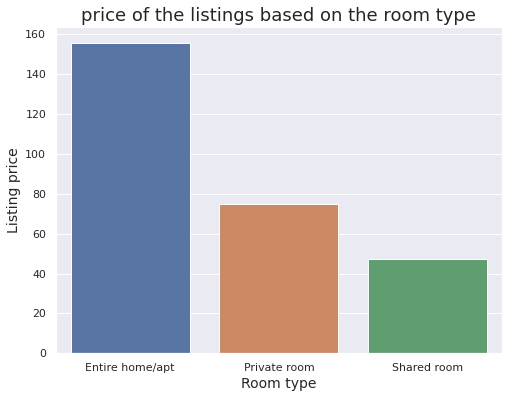

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='room_type',y='price',data=roomType_DF,ci=None )
plt.ylabel("Listing price", size=14)
plt.xlabel("Room type", size=14)
plt.title("price of the listings based on the room type", size=18)
plt.savefig("barplot_Seaborn_barplot_Python.png")


**The average price of different neighbourhoods**

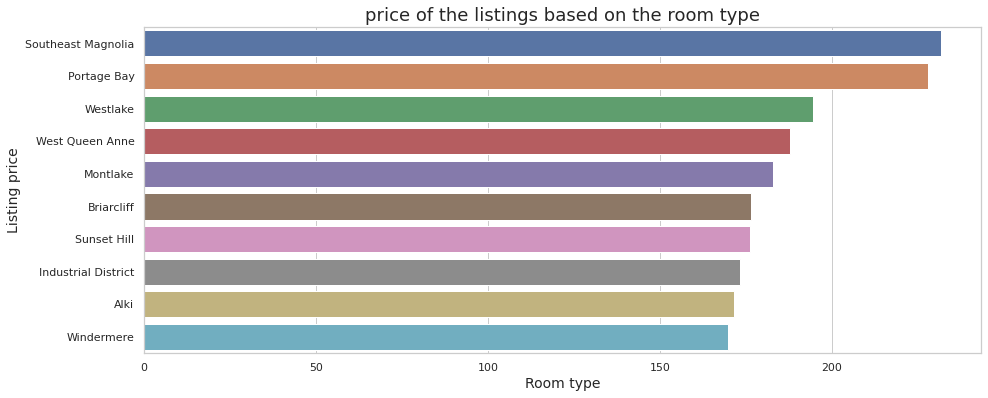

In [ ]:
roomType_DF=df.groupby('neighbourhood_cleansed').mean()['price']
roomType_DF=roomType_DF.reset_index()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.barplot(x='price',y='neighbourhood_cleansed',data=roomType_DF.sort_values('price',ascending=False).iloc[:10],ci=None)
plt.ylabel("Listing price", size=14)
plt.xlabel("Room type", size=14)
plt.title("price of the listings based on the room type", size=18)
plt.savefig("barplot_Seaborn_barplot_Python.png")


**How much is the average price of lstings in different room types and property types** 




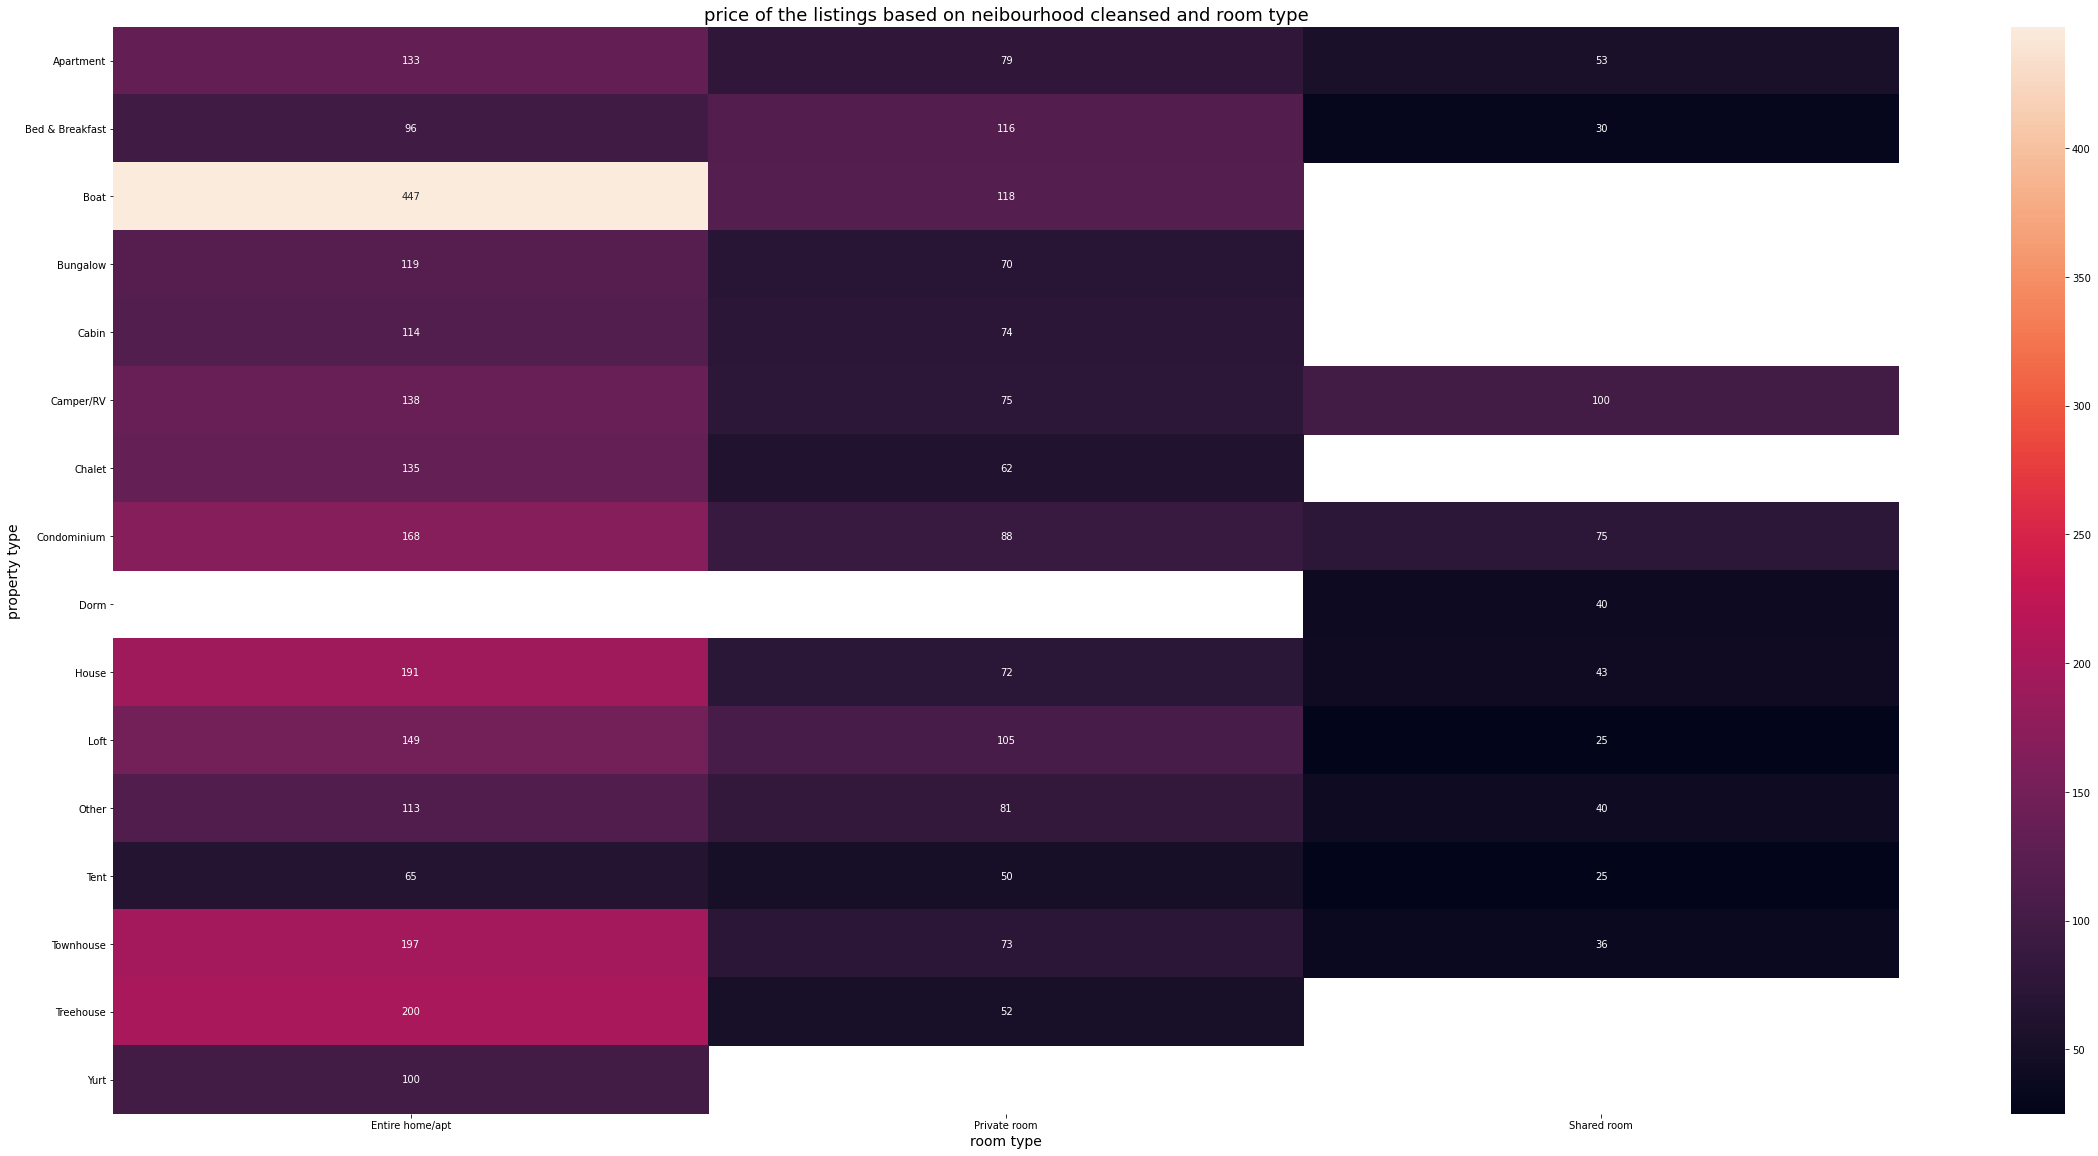

In [ ]:
plt.figure(figsize=(40, 20))
sns.heatmap(df.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")
plt.ylabel("property type", size=14)
plt.xlabel("room type", size=14)
plt.title("price of the listings based on neibourhood cleansed and room type", size=18)
plt.savefig("barplot_Seaborn_barplot_Python.png")


**Which amentities are provided by most expensive and least expensive lisitngs**

In [ ]:
amenities_price=df.groupby('amenities').mean()['price']
amenities_price=amenities_price.reset_index()

In [ ]:
amenities_price=amenities_price.sort_values(by=['price'])
most_expensive=list(amenities_price.tail()['amenities'])
least_expensive=list(amenities_price.head()['amenities'])

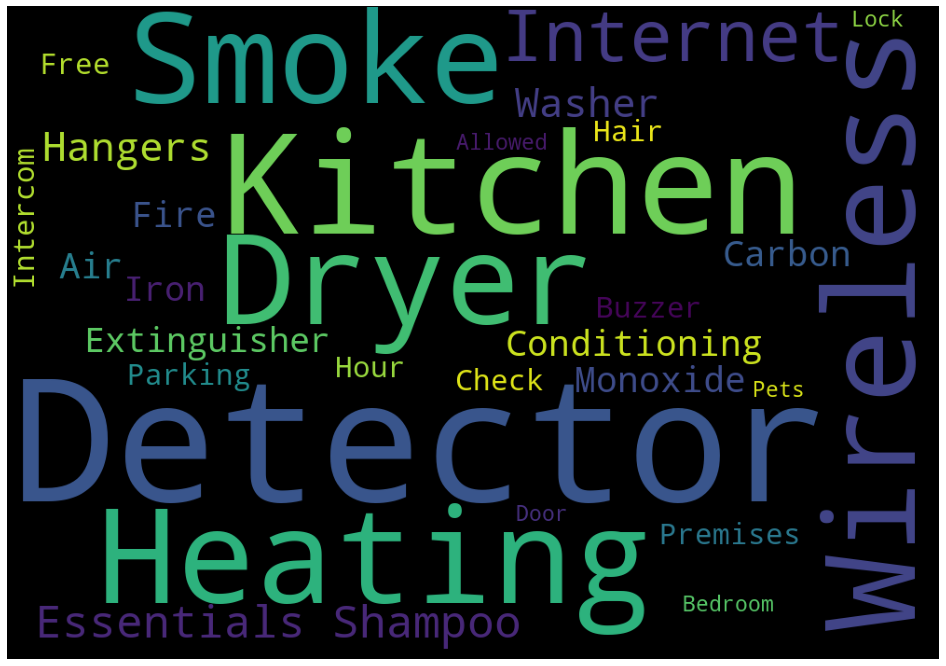

In [ ]:
#Amenities of the most least prices in listings 
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 1000, height = 700,stopwords=STOPWORDS).generate(', '.join(least_expensive))
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

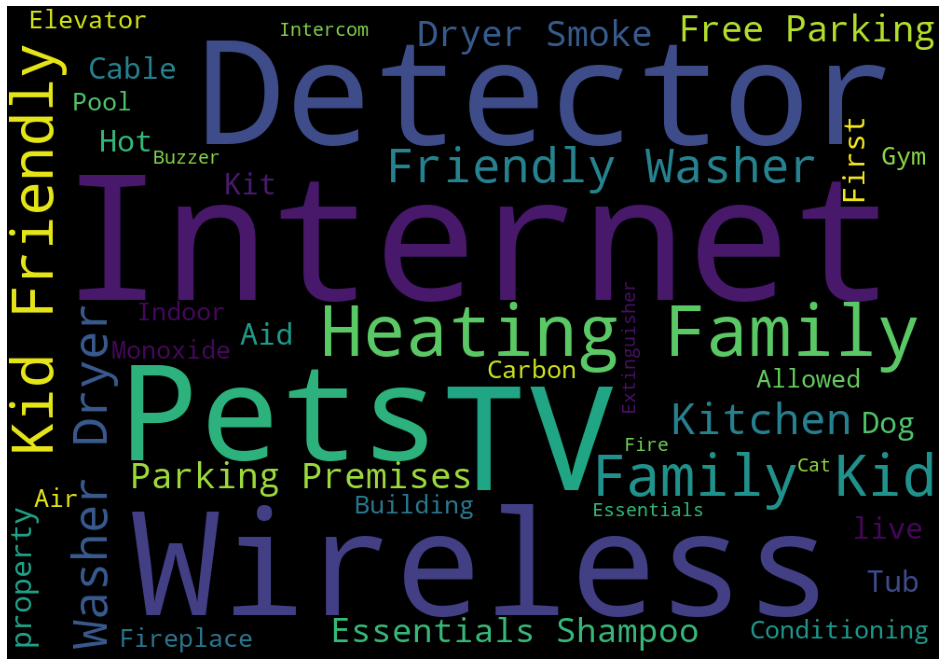

In [ ]:
#Amenities in most expensive prices in the listings 
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 1000, height = 700,stopwords=STOPWORDS).generate(', '.join(most_expensive))
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

